In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Graphing
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
Base.classes.keys()

['measurement', 'station']

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps=session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

june_temps

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
#  3. Convert the June temperatures to a list (without date)
june_temps_list=session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

june_temps_list

[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df=pd.DataFrame(june_temps, columns=['date', 'June Temps'])

june_temps_df.head()

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps=session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

december_temps

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [10]:
# 7. Convert the December temperatures to a list.
december_temps_list=session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

december_temps_list

[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temps_df=pd.DataFrame(december_temps, columns=['date', 'December Temps'])

december_temps_df.head()

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# Make a merged dataframe
june_temps_df_describe=june_temps_df.describe()

december_temps_df_describe=december_temps_df.describe()

summary_df=june_temps_df.merge(december_temps_df_describe, left_index=True, right_index=True)

summary_df

,date,June Temps,December Temps


<AxesSubplot:ylabel='Frequency'>

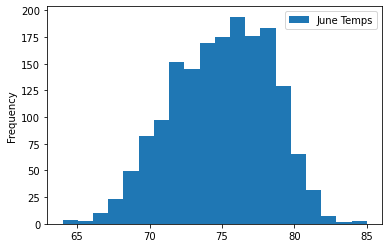

In [14]:
# June temperatures
june_temps_df.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

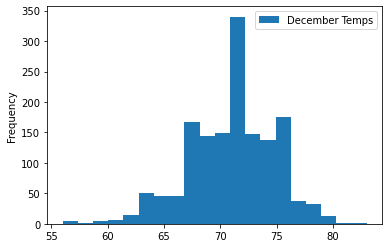

In [15]:
# December temperatures
december_temps_df.plot.hist(bins=20)

In [16]:
# June precipitation
june_precipitation_by_temp=session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()

june_precipitation_by_temp

[(78.0, 0.0),
 (76.0, 0.01),
 (78.0, 0.0),
 (76.0, 0.0),
 (77.0, 0.0),
 (78.0, 0.0),
 (77.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (79.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (77.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (77.0, 0.0),
 (77.0, 0.0),
 (82.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (77.0, 0.0),
 (76.0, 0.02),
 (78.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (77.0, 0.07),
 (78.0, 0.0),
 (73.0, 0.56),
 (70.0, 0.89),
 (76.0, 0.0),
 (77.0, 0.0),
 (77.0, 0.0),
 (77.0, 0.03),
 (77.0, 0.01),
 (78.0, 0.0),
 (77.0, 0.0),
 (77.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (77.0, 0.0),
 (78.0, 0.0),
 (78.0, 0.0),
 (75.0, 0.05),
 (76.0, 0.06),
 (76.0, 0.07),
 (77.0, None),
 (78.0, 0.0),
 (76.0, 0.0),
 (77.0, 0.01),
 (75.0, 0.01),
 (77.0, 0.0),
 (76.0, 0.02),
 (76.0, 0.02),
 (75.0, 0.0),
 (77.0, 0.0),
 (77.0, 0.0),
 (76.0, 0.0),
 (78.0, 0.0),
 (77.0, None),
 (76.0, None),
 (77.0, 0.0),
 (76.0, 0.0),
 (76.0, 0.0),
 (77.0, 0.0),
 (77.0, 0.0),
 (7

In [17]:
# Dataframe june precipitation by temperature
june_df=pd.DataFrame(june_precipitation_by_temp, columns=['June Temperature', 'June Precipitation'])

june_df.describe()

,June Temperature,June Precipitation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


Text(0.5, 1.0, 'June Precipitation x Temperature')

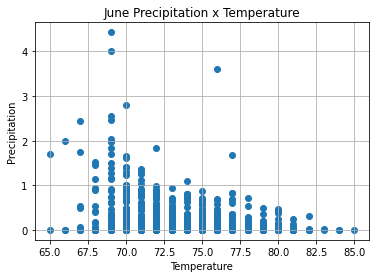

In [18]:
# Make scatter plot of June precipitation x temperature
plt.scatter(june_df['June Temperature'], june_df['June Precipitation'])

plt.grid()

plt.xlabel('Temperature')

plt.ylabel('Precipitation')

plt.title('June Precipitation x Temperature')

In [19]:
# December precipitation
december_precipiation_by_temp=session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()

december_precipiation_by_temp

[(76.0, 0.04),
 (74.0, 0.0),
 (74.0, 0.0),
 (64.0, 0.0),
 (64.0, 0.0),
 (67.0, 0.0),
 (77.0, 0.0),
 (66.0, 1.58),
 (69.0, 0.77),
 (68.0, 0.0),
 (68.0, 0.0),
 (71.0, 0.0),
 (74.0, 0.0),
 (67.0, 0.0),
 (66.0, 0.0),
 (69.0, 0.0),
 (71.0, 1.4),
 (70.0, 0.0),
 (70.0, 0.0),
 (74.0, None),
 (74.0, 0.13),
 (71.0, 0.55),
 (75.0, 0.06),
 (75.0, 0.01),
 (72.0, 0.0),
 (69.0, 0.03),
 (68.0, 0.08),
 (73.0, 0.0),
 (74.0, 0.0),
 (73.0, 0.0),
 (73.0, 0.0),
 (73.0, 0.0),
 (73.0, 0.0),
 (71.0, 0.13),
 (73.0, 0.07),
 (73.0, 0.07),
 (77.0, 0.08),
 (72.0, 0.4),
 (71.0, 0.7),
 (73.0, 0.0),
 (70.0, 0.01),
 (73.0, 0.07),
 (69.0, 0.02),
 (74.0, 0.15),
 (72.0, 0.02),
 (71.0, 0.18),
 (72.0, 0.03),
 (72.0, 0.04),
 (70.0, 0.1),
 (73.0, 0.03),
 (73.0, 0.0),
 (72.0, 0.0),
 (73.0, 0.0),
 (73.0, 0.0),
 (72.0, 0.0),
 (63.0, 0.01),
 (65.0, 0.0),
 (71.0, 0.0),
 (76.0, 0.0),
 (70.0, 0.2),
 (76.0, 0.01),
 (69.0, None),
 (69.0, None),
 (69.0, 0.0),
 (74.0, 0.0),
 (76.0, 0.0),
 (74.0, 0.0),
 (73.0, 0.0),
 (73.0, 0.14),
 (74.0

In [20]:
# December precipitation
december_df=pd.DataFrame(december_precipiation_by_temp, columns=['December Temperature', 'December Precipitation'])

december_df.describe()

,December Temperature,December Precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


Text(0.5, 1.0, 'December Precipitation x Temperature')

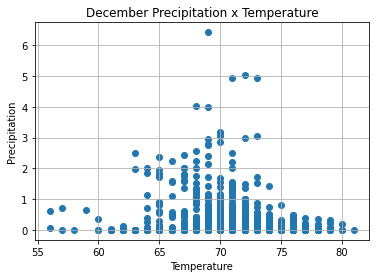

In [21]:
# Make scatter plot
plt.scatter(december_df['December Temperature'], december_df['December Precipitation'])

plt.grid()

plt.xlabel('Temperature')

plt.ylabel('Precipitation')

plt.title('December Precipitation x Temperature')